In [1]:
from demo import Spotify, Recommender
from demo.lib import DB
from demo.displays import Demo1

## 1. Intro

In [2]:
db = DB()

search_sp = Spotify()
search_sp.search()

mailbox_id = db.save_mailbox(search_sp.sel_tracks)

Demo1.pt1(mailbox_id, search_sp)
search_sp.sel_tracks.head()

계속하시려면 아무거나, 종료는 exit를 입력해주세요.exit


### 우체통 <u>'62977f3bf7d93ab9894113da'</u>이 등록되었습니다.

**총 <u>4개</u>의 Seed음악이 들어있습니다.**

,trackId,trackName,artistIds,artistNames,image
0,5xrtzzzikpG3BLbo4q1Yul,LILAC,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2734ed058...
1,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park,https://i.scdn.co/image/ab67616d0000b2738c0def...
2,02SbQgZbzMoylPoGr32ugF,Drama,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b2730d378c...
3,2g0LdZQce9xlcHb1mBJyuz,strawberry moon,3HqSLMAZ3g3d5poNaI7GOU,IU,https://i.scdn.co/image/ab67616d0000b273c4d4ad...


## 2. Recommender Init

In [3]:
recommender = Recommender(mailbox_id)
recommender.init_setting()

Demo1.pt2(recommender)
recommender.reco['tracks'].head()

### 우체통 <u>'62977f3bf7d93ab9894113da'</u>의 음악들의 <u>Spoitfy 추천 음악은 총 351 개</u> 입니다.

,trackId,trackName,artistIds,artistNames,image,seedId
0,0emCVoP02QWnj1dOhNn20Y,"깊은 밤을 날아서 (Flying, deep in the night)",0il5ZP3xYOECtONJtZ38Ln,KYUHYUN,https://i.scdn.co/image/ab67616d0000b2730b98d6...,5xrtzzzikpG3BLbo4q1Yul
1,6t2ubAB4iSYOuIpRAOGd4t,Cake - Challenge Version,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273b765af...,5xrtzzzikpG3BLbo4q1Yul
2,3b5Li4QKDVBx1x7fQuu54a,Tired,"7vk5e3vY1uw9plTHJAMwjN,25tMQOrIU4LlUo6Sv8v5SE","Alan Walker,Gavin James",https://i.scdn.co/image/ab67616d0000b273c31161...,5xrtzzzikpG3BLbo4q1Yul
3,2eAAEa8pxKF7My0EO4rFgR,Blow Your Mind (Mwah),6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,https://i.scdn.co/image/ab67616d0000b2736b915e...,5xrtzzzikpG3BLbo4q1Yul
4,0BBUGRUURDjwcXmDS3kQkN,Atlantis,2hRQKC0gqlZGPrmUKbcchR,SHINee,https://i.scdn.co/image/ab67616d0000b273e71098...,5xrtzzzikpG3BLbo4q1Yul


## 3. Recommend Process

### 데이터 병합

**Seed음악과 추천음악의 병합이 완료되었습니다. 총 <u>355개의 음악</u>들로 구성되어 있습니다.**

                  trackId  acousticness  danceability  energy  \
0  5xrtzzzikpG3BLbo4q1Yul        0.0895         0.738   0.890   
1  5quFr5s5PXYfUX5jV2EBZ1        0.1960         0.492   0.615   
2  02SbQgZbzMoylPoGr32ugF        0.8040         0.847   0.273   
3  2g0LdZQce9xlcHb1mBJyuz        0.1380         0.475   0.712   
4  0emCVoP02QWnj1dOhNn20Y        0.1340         0.676   0.898   

   instrumentalness  key  liveness  loudness  speechiness    tempo  valence  
0          0.000002    2    0.2130    -2.275       0.0748  114.942    0.750  
1          0.000000    2    0.0772    -6.663       0.2440   90.081    0.458  
2          0.000000    0    0.1450    -5.487       0.0361  105.941    0.575  
3          0.000000    6    0.0936    -3.306       0.0431  169.796    0.443  
4          0.000000    2    0.2290    -4.240       0.0459  121.046    0.522  


### 데이터 전처리

**데이터셋의 Min-Max Normalization 작업이 완료되었습니다.**

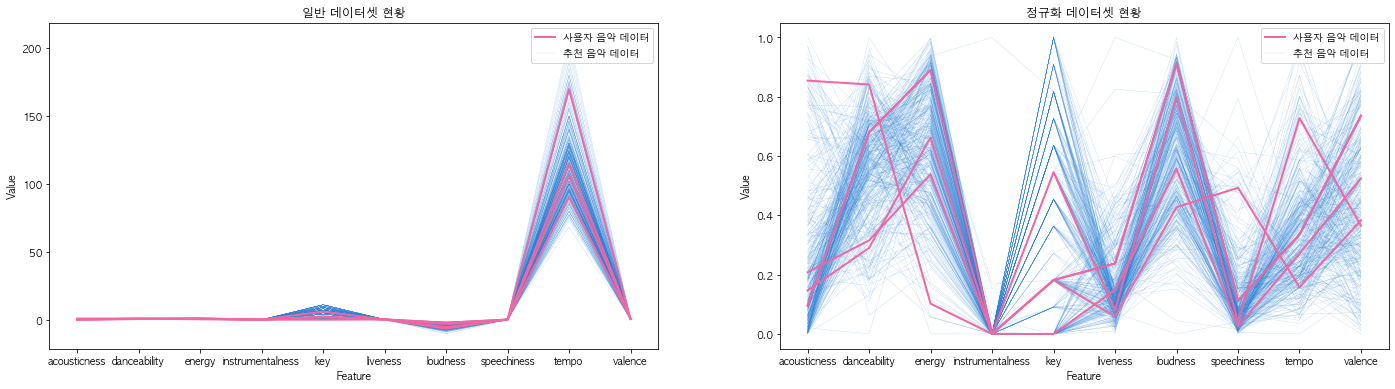

### KMeans Clustering Fitting

**클러스터링 작업이 완료되었습니다.**

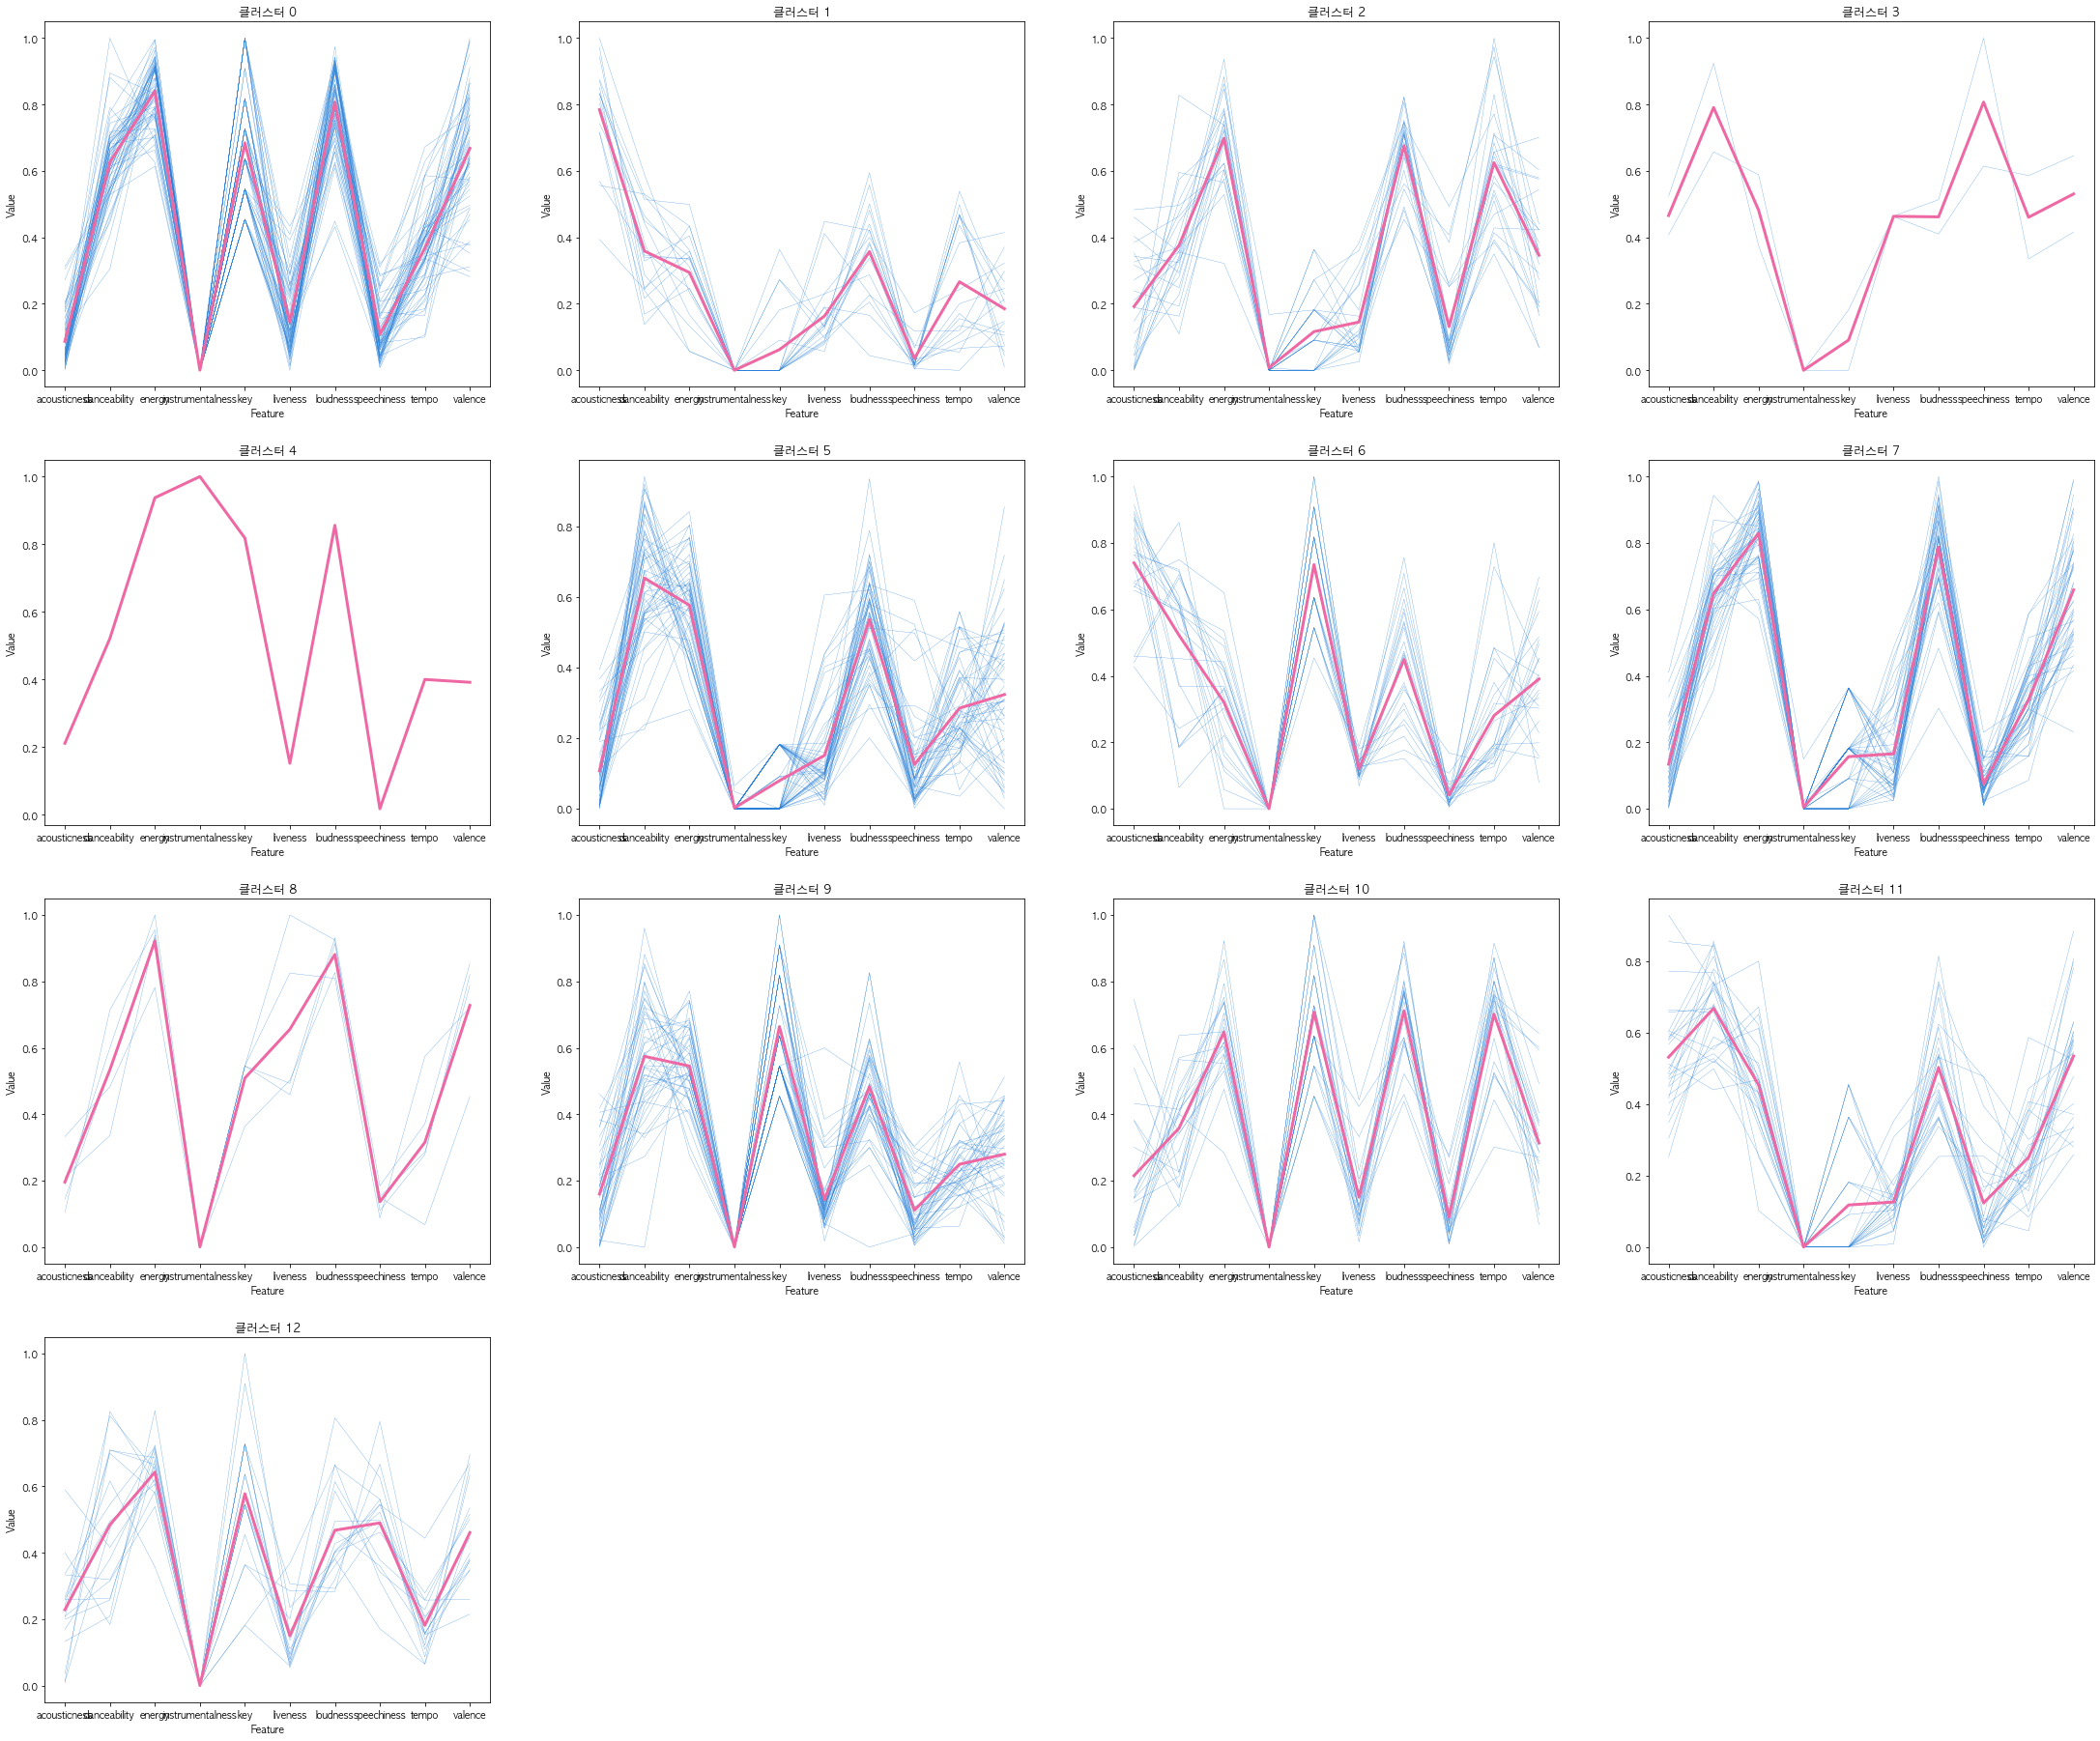

### KMeans Clustering Parsing

**우체통 <u>'62977f3bf7d93ab9894113da'</u>의 음악들은 <u>클러스터[ 7 10 11 12]번</u>에 속해 있습니다.**

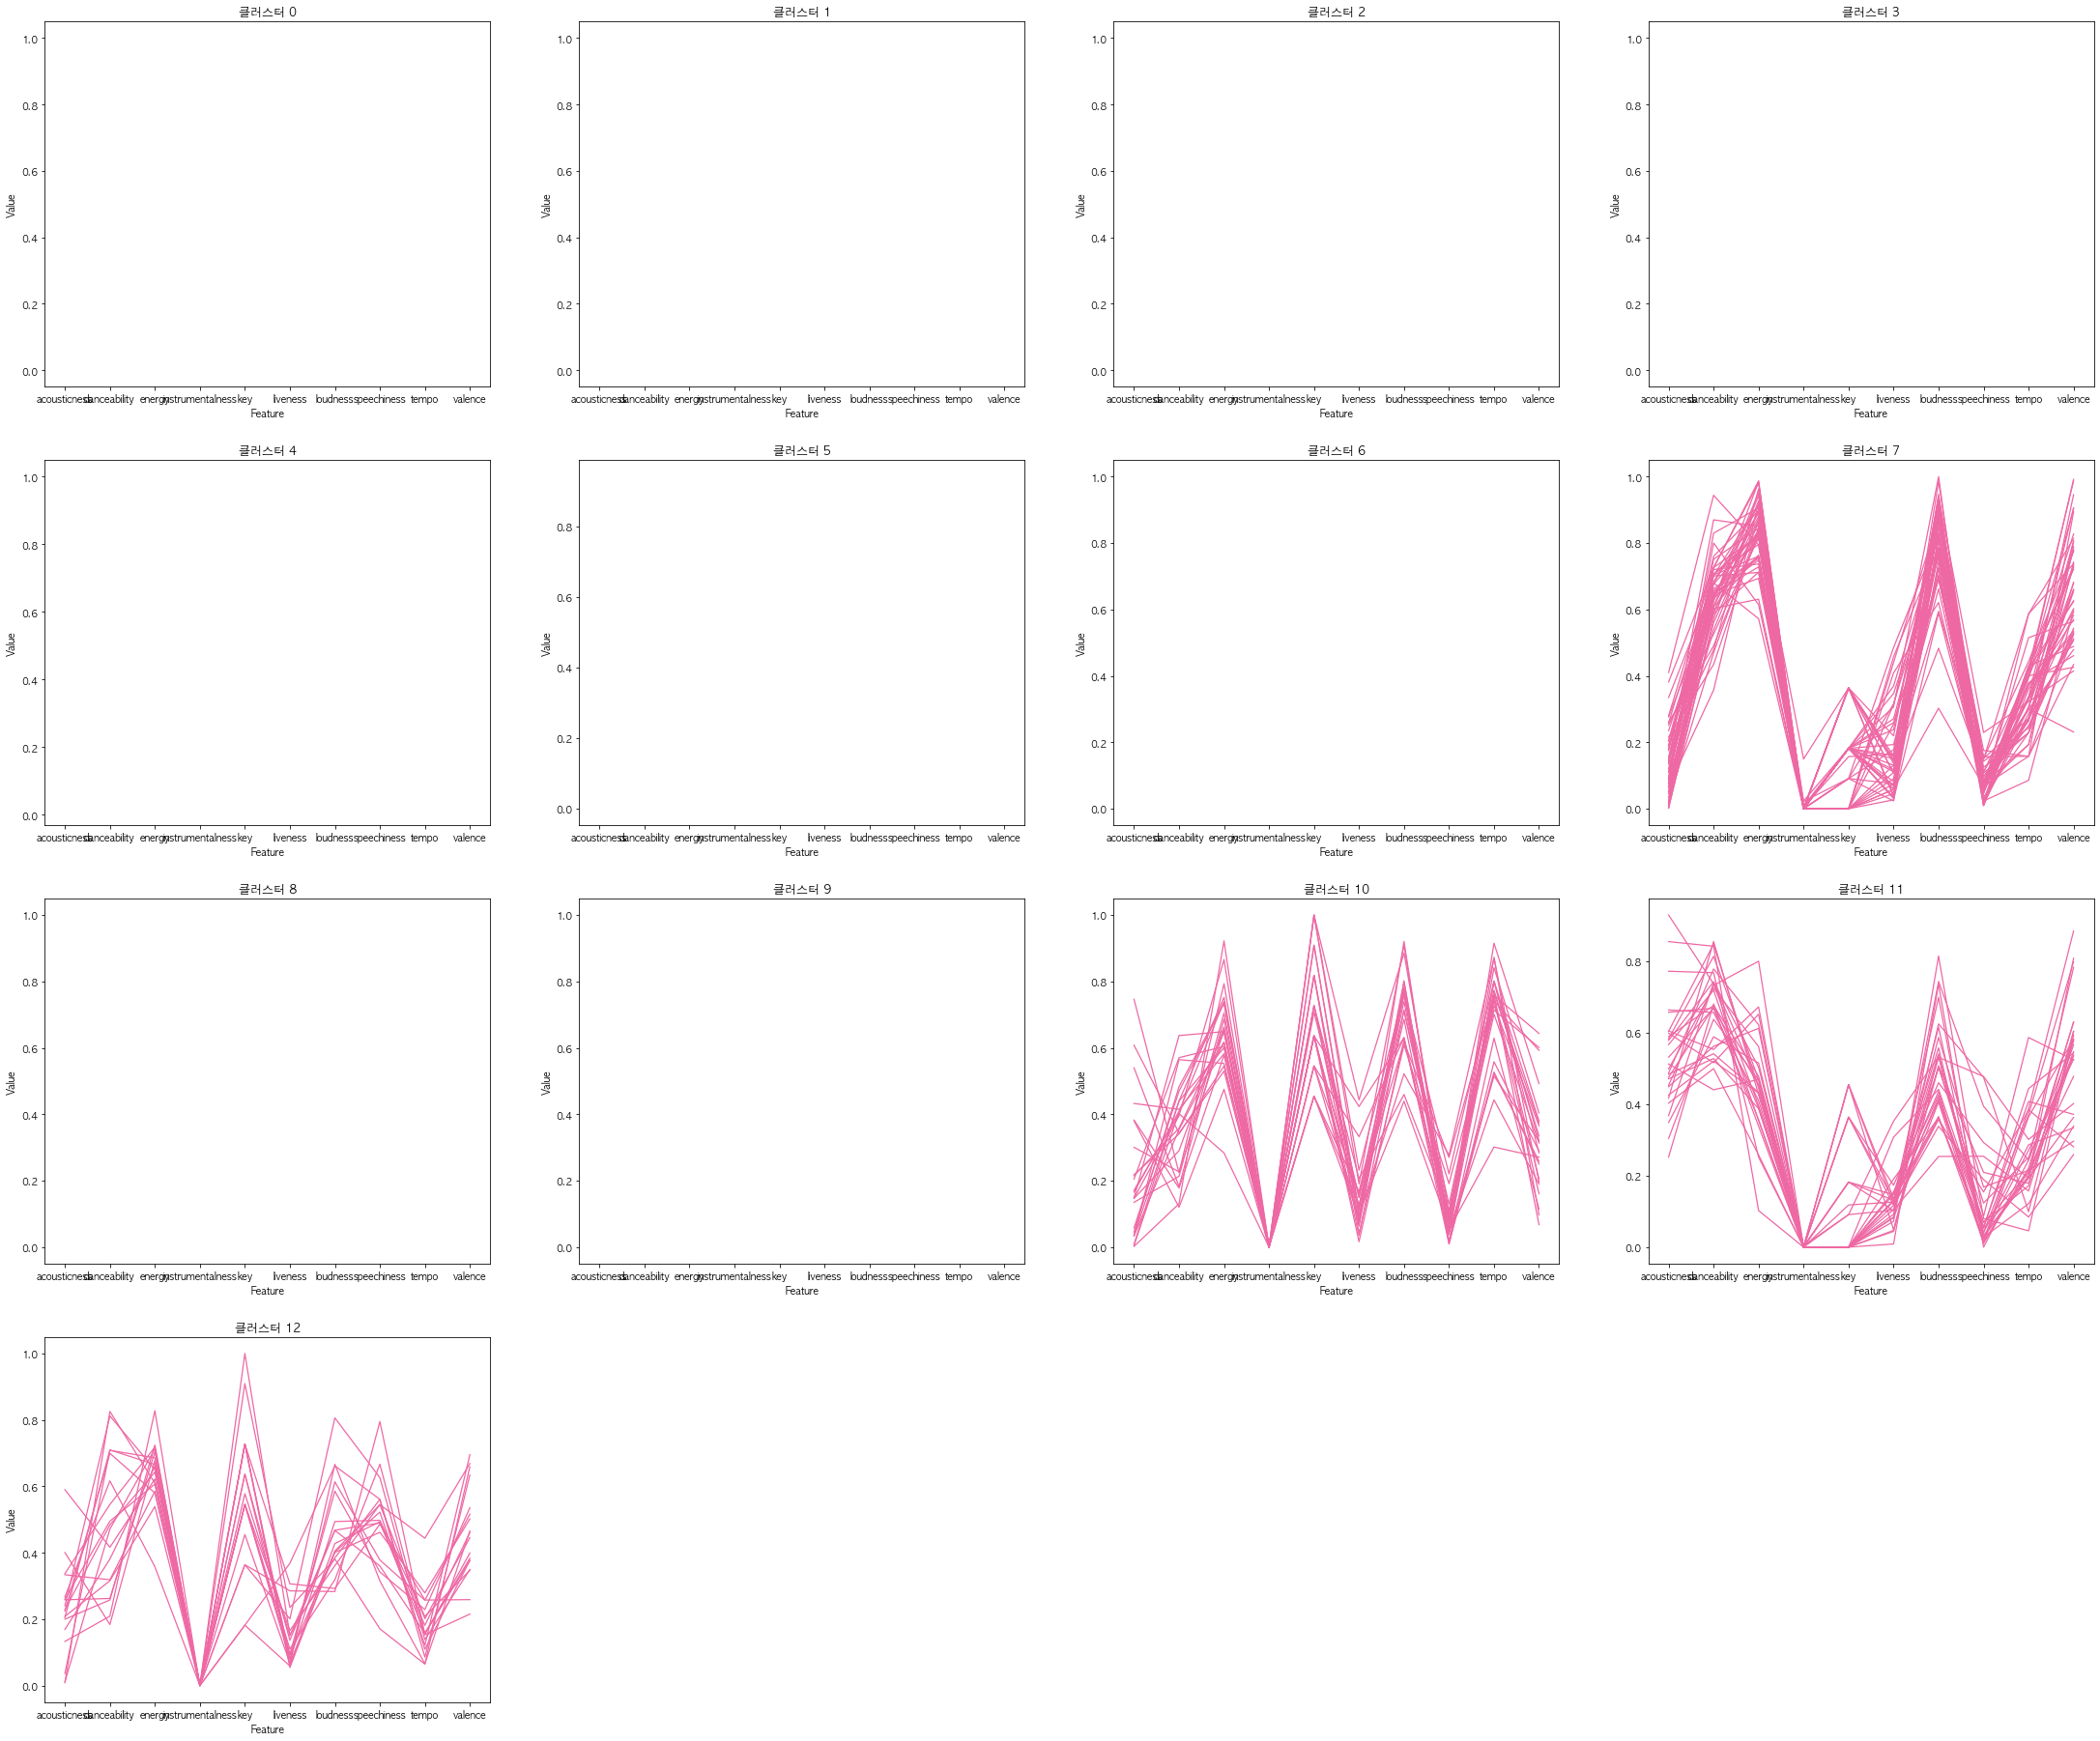

**우체통 <u>'62977f3bf7d93ab9894113da'</u>를 위한 총 <u>110개의 추천음악</u>이 선정 되었습니다.**

### Rate Adjusting

**추천음악 수량이 <u>110개</u>에서 <u>100개</u>로 조정되었습니다.**

<b>추천음악 수량 표준편차 변화 : <u>5 → 2</u></b>

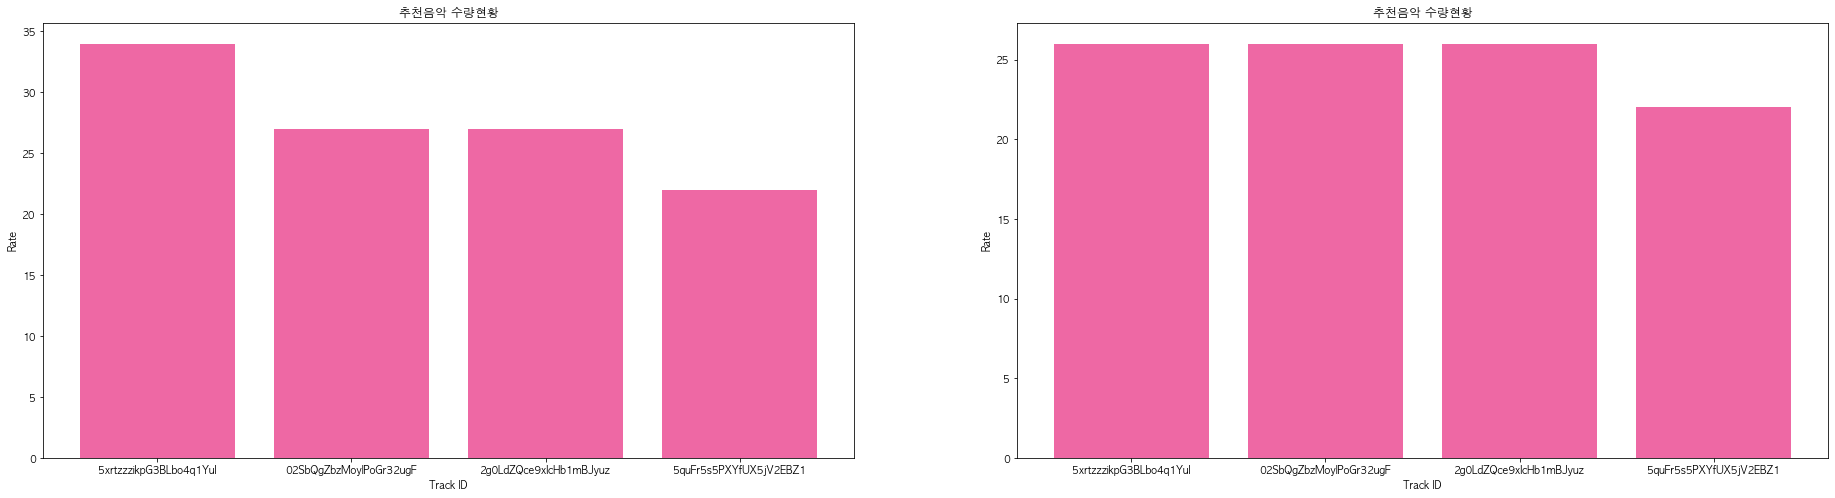

### <u>우체통 62977f3bf7d93ab9894113da를 위한</u> 음악 <u>100개</u>가 준비 되었습니다.

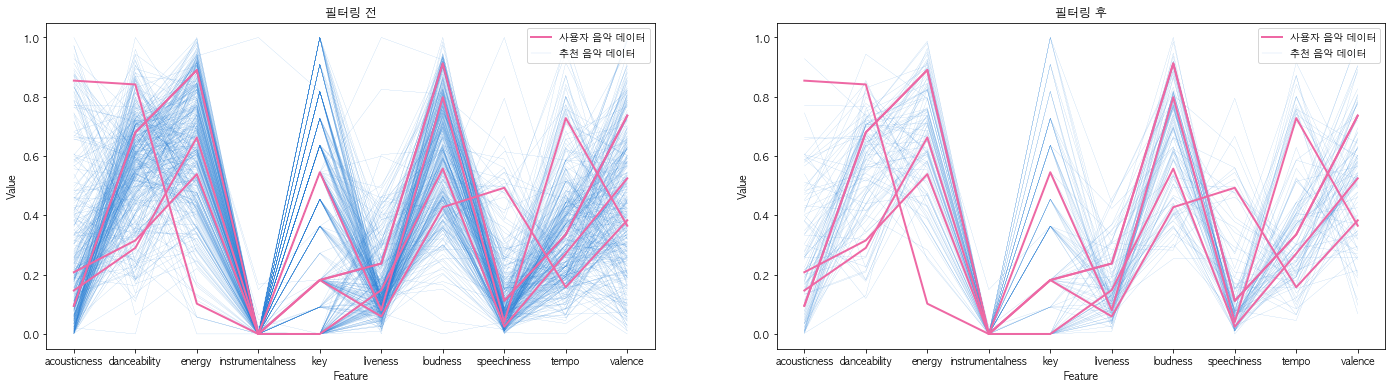

,trackId,trackName,artistIds,artistNames,image,seedId
0,0emCVoP02QWnj1dOhNn20Y,"깊은 밤을 날아서 (Flying, deep in the night)",0il5ZP3xYOECtONJtZ38Ln,KYUHYUN,https://i.scdn.co/image/ab67616d0000b2730b98d6...,5xrtzzzikpG3BLbo4q1Yul
1,6t2ubAB4iSYOuIpRAOGd4t,Cake - Challenge Version,0LyfQWJT6nXafLPZqxe9Of,Various Artists,https://i.scdn.co/image/ab67616d0000b273b765af...,5xrtzzzikpG3BLbo4q1Yul
2,3b5Li4QKDVBx1x7fQuu54a,Tired,"7vk5e3vY1uw9plTHJAMwjN,25tMQOrIU4LlUo6Sv8v5SE","Alan Walker,Gavin James",https://i.scdn.co/image/ab67616d0000b273c31161...,5xrtzzzikpG3BLbo4q1Yul
3,4fZYGHiRcKxwVSnF498uaE,Nillili Mambo,4RnezwRV7VBJUCI1S0AE5u,Block B,https://i.scdn.co/image/ab67616d0000b273a22e31...,5xrtzzzikpG3BLbo4q1Yul
4,1dyMRzKZMakJqmOnsUUZ9X,Hot Summer,3wRA5UYoo08BBKJnzyKkpF,f(x),https://i.scdn.co/image/ab67616d0000b273f968b1...,5xrtzzzikpG3BLbo4q1Yul


In [4]:
Demo1.pt3(recommender)
recommender.reco_['tracks'].head()

## 4. Outro

In [5]:
mail_id = db.save_mail(recommender)
Demo1.pt4(recommender, mail_id)

### 우체통 <u>62977f3bf7d93ab9894113da</u>를 위한 음악편지 <u>62977f9cf7d93ab9894113dc</u>를 넣어놨어요.